**Data Source**
https://www.fs.usda.gov/rds/archive/Catalog/RDS-2013-0009.4/

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [ ]:
df=pd.read_csv('/content/ELAVATION_STAT.csv')

In [ ]:
print(df.columns) 
df.head()

Index(['DISCOVERY_DATE', 'DISCOVERY_DOY', 'FIRE_SIZE', 'FIRE_YEAR', 'FOD_ID',
       'STAT_CAUSE_DESCR', 'elev_max', 'elev_mean', 'elev_min', 'slope_mean',
       'lon', 'lat'],
      dtype='object')


,DISCOVERY_DATE,DISCOVERY_DOY,FIRE_SIZE,FIRE_YEAR,FOD_ID,STAT_CAUSE_DESCR,elev_max,elev_mean,elev_min,slope_mean,lon,lat
0,2013-01-05T00:00:00+00:00,5,4.0,2013,201842250,Miscellaneous,215,193.695950,168,18.022604,-79.071667,38.557778
1,2013-01-08T00:00:00+00:00,8,2.0,2013,201840578,Debris Burning,136,88.597007,57,20.427586,-79.383333,38.300000
2,2013-01-08T00:00:00+00:00,8,2.0,2013,201840580,Debris Burning,434,391.754443,348,17.098140,-79.029444,38.741389
3,2013-01-10T00:00:00+00:00,10,1.5,2013,201840757,Debris Burning,59,36.743932,-2,15.562330,-82.447778,36.854722
4,2013-01-23T00:00:00+00:00,23,0.5,2013,201840781,Equipment Use,680,507.770072,341,20.657843,-80.201944,37.760278


In [ ]:
# Check for Nan values
df.isnull().values.any()
df1 = df[df.isna().any(axis=1)]
print("Num NAN values: {}".format(df1.shape[0]))

Num NAN values: 0


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['STAT_CAUSE_CODE'] = le.fit_transform(df.STAT_CAUSE_DESCR.values)
df.head()

In [ ]:
le.classes_

array(['Arson', 'Campfire', 'Children', 'Debris Burning', 'Equipment Use',
       'Fireworks', 'Lightning', 'Miscellaneous', 'Missing/Undefined',
       'Powerline', 'Railroad', 'Smoking', 'Structure'], dtype=object)

https://stackoverflow.com/questions/16453644/regression-with-date-variable-using-scikit-learn

In [ ]:
import datetime as dt
df['MYDATE'] = pd.to_datetime(df['DISCOVERY_DATE'])
df['MYDATE']=df['MYDATE'].map(dt.datetime.toordinal)
df.head(5)

In [ ]:
#Changing pandas dataframe to numpy array
Y = df['FIRE_SIZE'].values
X = df[['MYDATE', 'STAT_CAUSE_CODE', 'elev_max', 'elev_mean', 'elev_min', 'slope_mean','lon','lat']]
print(Y.shape)
print(X.shape)

(21833,)
(21833, 9)


In [ ]:
#Normalize the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# Shuffles the data before split
# Train/Test split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.5)
print("# Train: {} , #Test: {}".format(X_train.shape[0], X_test.shape[0]))
print("# inputs: {}".format(X_train.shape[1]))
n = X_train.shape[1]

# Train: 10916 , #Test: 10917
# inputs: 10


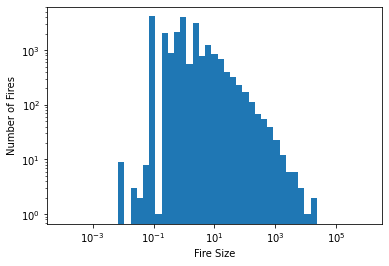

Mean fire size: 15.648139058543215
Median fire size: 1.0
Var in fire size: 46737.15855134302


In [ ]:
#Distibution of fire size
plt.hist(Y, bins=np.logspace(-4,6, 50));
plt.ylabel('Number of Fires')
plt.xlabel('Fire Size')
plt.gca().set_yscale("log")
plt.gca().set_xscale("log")
plt.savefig("kaggle_fires_dist_log.png")
plt.show()

print("Mean fire size: {}".format(np.mean(Y)))
print("Median fire size: {}".format(np.median(Y)))
print("Var in fire size: {}".format(np.var(Y)))

In [ ]:
# Neural network
model = Sequential()
model.add(Dense(32, input_dim=n, kernel_initializer='normal', activation='relu'))
model.add(Dense(64, input_dim=n , activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae','accuracy'])

In [ ]:
#Save partly trained model
#model.save('partly_trained.h5')

#Load partly trained model
from keras.models import load_model
#model = load_model('partly_trained.h5')

#Continue training
history = model.fit(X_train, y_train, epochs=10, batch_size=640, verbose = 2, validation_split = 0.1, shuffle=True)

Epoch 1/10
16/16 - 2s - loss: 83576.4531 - mse: 83576.4531 - mae: 18.0214 - val_loss: 1059.5793 - val_mse: 1059.5793 - val_mae: 8.0735
Epoch 2/10
16/16 - 0s - loss: 81799.1797 - mse: 81799.1797 - mae: 25.7016 - val_loss: 1457.6948 - val_mse: 1457.6949 - val_mae: 27.2463
Epoch 3/10
16/16 - 0s - loss: 74636.4141 - mse: 74636.4141 - mae: 55.9485 - val_loss: 3148.2922 - val_mse: 3148.2922 - val_mae: 39.8950
Epoch 4/10
16/16 - 0s - loss: 40954.2539 - mse: 40954.2539 - mae: 27.1452 - val_loss: 384.1126 - val_mse: 384.1126 - val_mae: 6.0678
Epoch 5/10
16/16 - 0s - loss: 10320.0684 - mse: 10320.0684 - mae: 9.6056 - val_loss: 814.4372 - val_mse: 814.4372 - val_mae: 7.0582
Epoch 6/10
16/16 - 0s - loss: 7670.5220 - mse: 7670.5220 - mae: 11.2424 - val_loss: 558.3340 - val_mse: 558.3340 - val_mae: 9.1999
Epoch 7/10
16/16 - 0s - loss: 5694.5493 - mse: 5694.5493 - mae: 12.6693 - val_loss: 350.4988 - val_mse: 350.4988 - val_mae: 6.8618
Epoch 8/10
16/16 - 0s - loss: 14327.3340 - mse: 14327.3340 - mae: 

In [ ]:
#Save partly trained model
model.save('partly_trained.h5')

#Load partly trained model
from keras.models import load_model
model = load_model('partly_trained.h5')


loss, mse, mae, accuracy = model.evaluate(X_test, y_test)
print('MSE: %.2f, MAE: %.2f' % (mse,mae))

342/342 [==============================] - 1s 1ms/step - loss: 310.8154 - mse: 310.8154 - mae: 5.8298
MSE: 310.82, MAE: 5.83


342/342 [==============================] - 1s 1ms/step


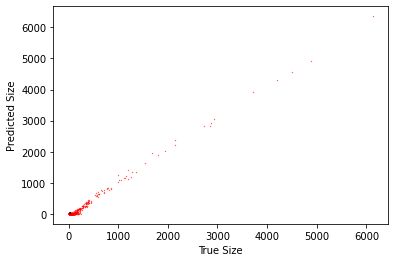

In [ ]:
#Visualize some predictions
preds = model.predict(X_test, verbose=1)
plt.scatter(y_test, preds, s=0.3, marker='.', c='r')
plt.xlabel('True Size')
plt.ylabel('Predicted Size')
plt.plot([20,50],[20,50],c='k',linestyle='--')
plt.show()

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

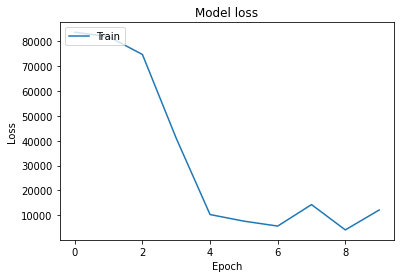

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# SVM
from sklearn import svm
from sklearn.metrics import r2_score, mean_absolute_error

n = 70000
svm_reg = svm.SVR(kernel='rbf', degree=3, gamma='auto')
svm_reg.fit(X_train[0:n,:],y_train[0:n].reshape(-1))

y_pred = svm_reg.predict(X_test[0:n,:])

def mean_absolute_percentage_error(y_test, y_pred): 
    return np.mean(np.abs((y_test - y_pred) / (y_test+10e-1)) ) * 100
print("MAE: {}".format(mean_absolute_error(y_test[0:n],y_pred)))
print("MAPE: {}".format(mean_absolute_percentage_error(y_test[0:n],y_pred)))
print("---------------------------------------")

MAE: 13.09863421830922
MAPE: 50.19473888213397
---------------------------------------


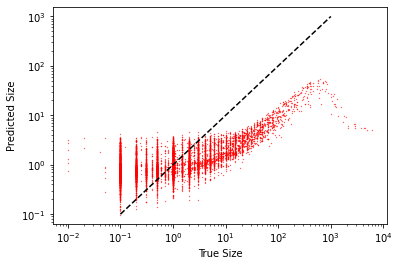

In [ ]:
#Visualize svm predictions
plt.scatter(y_test[0:n], y_pred, s=0.3, marker='.', c='r')
plt.xlabel('True Size')
plt.ylabel('Predicted Size')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')
plt.savefig("kaggle_fires_svm_preds.png")
plt.show()

In [ ]:
# SKlearn MLP
from sklearn.neural_network import MLPRegressor

n = 10000

NN = MLPRegressor(hidden_layer_sizes=(800,800,800,800),max_iter=200)

NN.fit(X_train[0:n,:],y_train[0:n].reshape(-1))
y_pred = NN.predict(X_test[0:n,:])

print("MAE: {}".format(mean_absolute_error(y_test[0:n],y_pred)))
print("r2: {}".format(r2_score(y_test[0:n],y_pred)))
print("---------------------------------------")

MAE: 5.001023649628916
r2: 0.9740653002235041
---------------------------------------


In [ ]:
# K Nearest Neighbours
from sklearn.neighbors import KNeighborsRegressor

n = 10000

for nbs in [3,5,10]:
    for wts in ['distance','uniform']:
        K_nn = KNeighborsRegressor(n_neighbors=nbs,
                                   weights=wts,
                                   n_jobs=6)

        K_nn.fit(X_train[0:n,:],y_train[0:n].reshape(-1))
        y_pred = K_nn.predict(X_test[0:n,:])

        print("nbs: {}, wts: {}".format(nbs, wts))
        print("MAE: {}".format(mean_absolute_error(y_test[0:n],y_pred)))
        print("r2: {}".format(r2_score(y_test[0:n],y_pred)))
        print("---------------------------------------")

nbs: 3, wts: distance
MAE: 7.723249995429664
r2: 0.967403340815878
---------------------------------------
nbs: 3, wts: uniform
MAE: 7.852899664793234
r2: 0.9660163442129662
---------------------------------------
nbs: 5, wts: distance
MAE: 8.064183379618482
r2: 0.9545461481019593
---------------------------------------
nbs: 5, wts: uniform
MAE: 8.308573798180058
r2: 0.9440453762296405
---------------------------------------
nbs: 10, wts: distance
MAE: 8.678417003191052
r2: 0.9193031343445635
---------------------------------------
nbs: 10, wts: uniform
MAE: 9.076729496966829
r2: 0.8824788351108173
---------------------------------------


In [ ]:
# Decision Tree
from sklearn import tree

tree_clf = tree.DecisionTreeRegressor(criterion='mae')

tree_clf.fit(X_train[0:n,:],y_train[0:n].reshape(-1))

y_pred = tree_clf.predict(X_test[0:n,:])

print("MAE: {}".format(mean_absolute_error(y_test[0:n],y_pred)))
print("r2: {}".format(r2_score(y_test[0:n],y_pred)))
print("---------------------------------------")


MAE: 1.2296490110009999
r2: 0.9375051060721964
---------------------------------------


In [ ]:
# Stacked regressors
from mlxtend.regressor import StackingRegressor

n = 10000

estimators = [K_nn, NN, svm_reg]

regStack = StackingRegressor(regressors=estimators,
                             meta_regressor=NN)

regStack.fit(X_train[0:n,:],y_train[0:n].reshape(-1))

y_pred = regStack.predict(X_test[0:n,:])

print("MAE: {}".format(mean_absolute_error(y_test[0:n],y_pred)))
print("r2: {}".format(r2_score(y_test[0:n],y_pred)))
print("---------------------------------------")


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MAE: 6.126757494842066
r2: 0.7945752811840999
---------------------------------------


In [ ]:
#Best Features - Univariate statistical selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

feature_names = ['MYDATE', 'STAT_CAUSE_CODE', 'elev_max', 'elev_mean', 'elev_min', 'slope_mean','lon','lat']

bestfeatures = SelectKBest(score_func=f_classif, k=5)
fit = bestfeatures.fit(X,np.array(Y).astype(int))
dfscores = pd.DataFrame(fit.scores_)
df_specs = pd.Series(feature_names).astype(str)
featureScores = pd.concat([df_specs,dfscores],axis=1)
featureScores.columns = ['Feature','f_classif Score'] 
print(featureScores.nlargest(5,'f_classif Score'))  

           Feature  f_classif Score
0             DATE     1.135177e+08
2         elev_max     5.563171e+00
3        elev_mean     5.006158e+00
4         elev_min     4.024666e+00
1  STAT_CAUSE_CODE     1.633780e+00


In [ ]:
#Best Features - importance
# Feature importance gives you a score for each feature of your data, the higher the score more 
# important or relevant is the feature towards your output variable.
# Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using 
# Extra Tree Classifier for extracting the top 10 features for the dataset.

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Index(['DISCOVERY_DATE', 'DISCOVERY_DOY', 'FIRE_SIZE', 'FIRE_YEAR', 'FOD_ID',
       'STAT_CAUSE_DESCR', 'elev_max', 'elev_mean', 'elev_min', 'slope_mean',
       'lon', 'lat', 'STAT_CAUSE_CODE', 'Date'],
      dtype='object')


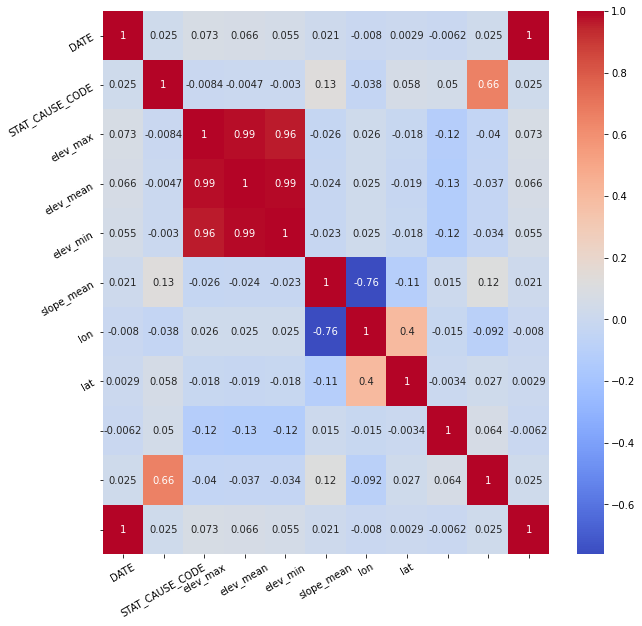

In [ ]:
# Best feautres - correlation heatmap
print(df.columns) 
import seaborn as sns
feature_names =  ['MYDATE', 'STAT_CAUSE_CODE', 'elev_max', 'elev_mean', 'elev_min', 'slope_mean','lon','lat']
data = np.concatenate((X_train,y_train.reshape(-1,1)),axis=1)
corrmat = np.corrcoef(data.T)
plt.figure(figsize=(10,10))
g=sns.heatmap(corrmat,annot=True,cmap="coolwarm")
g.set_xticklabels(feature_names,rotation=30)
g.set_yticklabels(feature_names,rotation=30)
plt.show()